### Here in this notebook i want to make a basic machine learning and data science tutorial through iris dataset for complete beginners. i tried to cover a lots of algorithms that new kagglers and brand new machine learning lovers have a good sense about most important concepts in these fields

### In this tutorial we will cover many algorithms like Logistic Regression, Naive Bayes, KNN, SVM and also ensemble methods like Random Forest and adaboost also we cover some sort of optimizing method like GridSearch and elbow method, feature scaling,  visualizations and more fun stuff in ML

# Importing Libraries

In [92]:
#here we import our exciting libraries:
# Please just don't worry if brief comments doesnt make sense we are gonna discuss everything later
import numpy as np # numpy used for mathematics and linear algebra
from pandas import read_csv # used for working with data; Dataframe , splitting dataset, etc and read_csv function
# used for importing dataset
from sklearn.model_selection import train_test_split #used for splitting dataset to train & test subsets
from sklearn.model_selection import KFold # one of the best cross validation algorithms;we're gonna dig into it later..
from sklearn.model_selection import cross_val_score #easy way to use cross_validation ( check sklearn Docs)
from sklearn.metrics import accuracy_score #In multilabel classification, this function computes subset accuracy:
# the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
from sklearn.metrics import confusion_matrix # Also called error matrix,we use it to check model performance
# In other word we can see how much our model is accurate in making predictions.we discuss it deeply later
# but i highly recommend you to check the link bellow for understand better about everything like recall,precision..
# "https://en.wikipedia.org/wiki/Confusion_matrix" .. by the way don't worry we're gonna discuss it in detail
from sklearn.metrics import classification_report #This function tells us about some evaluation metrics about
# our model
# Now we want to import some classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Finally we import our visualization libraries for visualize the data to have better sense of our dataset for
# analizing the data
import matplotlib.pyplot as plt # One of the best libraries for data visualization
import seaborn as sns #another lovely library for data visualization that help us to creating beautiful plots
%matplotlib inline

# Loading dataset

In [93]:
# In this part we want to first load our dataset
filename = 'iris_data.csv' # here you choose your dataset from a path somewhere in your disk and assign it to a
# variable
names = ['sepal-length','sepal-width','petal-length','petal-width','class'] # in this line we assign all of the
# dataset columns in names variable
dataset = read_csv(filename, names=names) # and finally we use read_csv function from pandas library to read the
# the dataset from disk and then we assign it to dataset variable

In [94]:
#now lets check the shape of our dataset
print(dataset.shape)

(150, 5)


In [95]:
# as you can see the result is (150, 5)
# That shows us we have a dataset that contain 5 columns and 150 rows

In [96]:
# for having a better understand of dataset we can look at the top rows with the head() function
# head() takes n top rows as a parameter you want to see - the default number of n is 5
# you can also use tail() function to check last n rows
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### as you can see we have 5 columns that contains: sepal-length, sepal-width, petal-length, petal-width and class except the class that contains categorical values the other columns has numerical because of our task that is classification (predicting class label of unseen data) we should specify which columns are features that our model learn from their values and later predict the unseen data class label with these features actually in classification tasks we have a bunch of data and each data has some features and a class label then the classification model should learn from these data that each data with what features is belong to what class and finally when we give a new set of data to our model, the model predict class label for each data point from it features

In [98]:
# this function give us a total statistical overview about the dataset
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [99]:
# Let's check the class column and see that how many class we have and how many data point each class contains
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [100]:
# ok, so we have three class and 50 data point for each of them

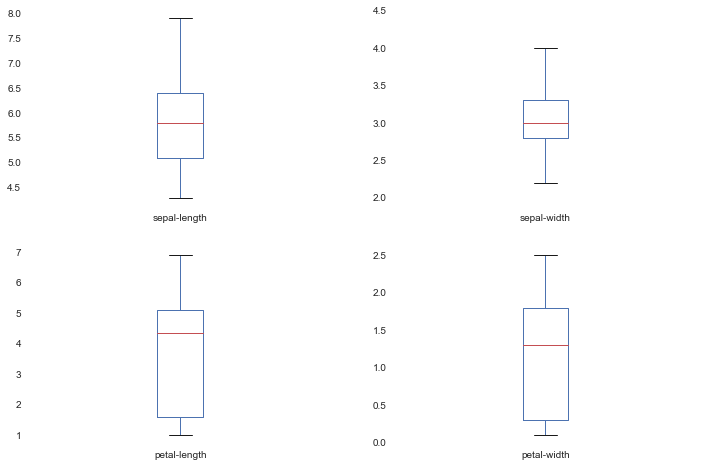

In [102]:
# Let's make some visualization using matplotlib
# here below we use plot function with some parameters like kind which in this example we specify it as Box plot
# I highly recommend you to review kinds of plots also read matplotlib documentation through it's examples
dataset.plot(kind='box', subplots=True, layout=(2,2), figsize=(12, 8), sharex=False,sharey=False)
plt.show()

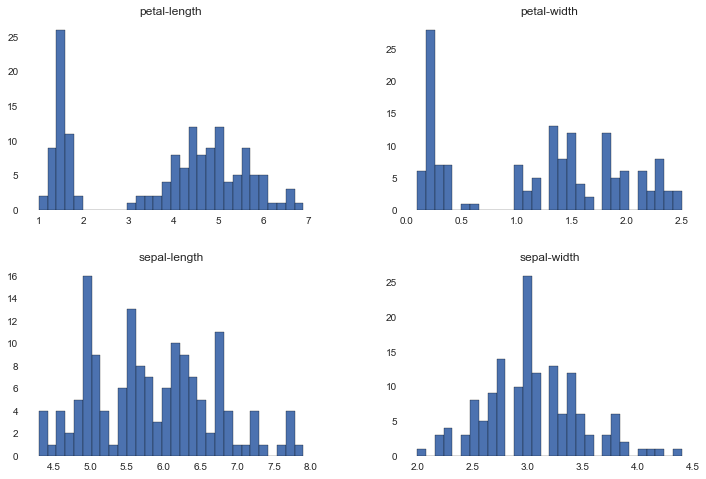

In [108]:
# this plot show the dataset through histogram
from matplotlib import colors
dataset.hist(bins=30, grid=True, figsize=(12, 8), edgecolor='black')
plt.show()

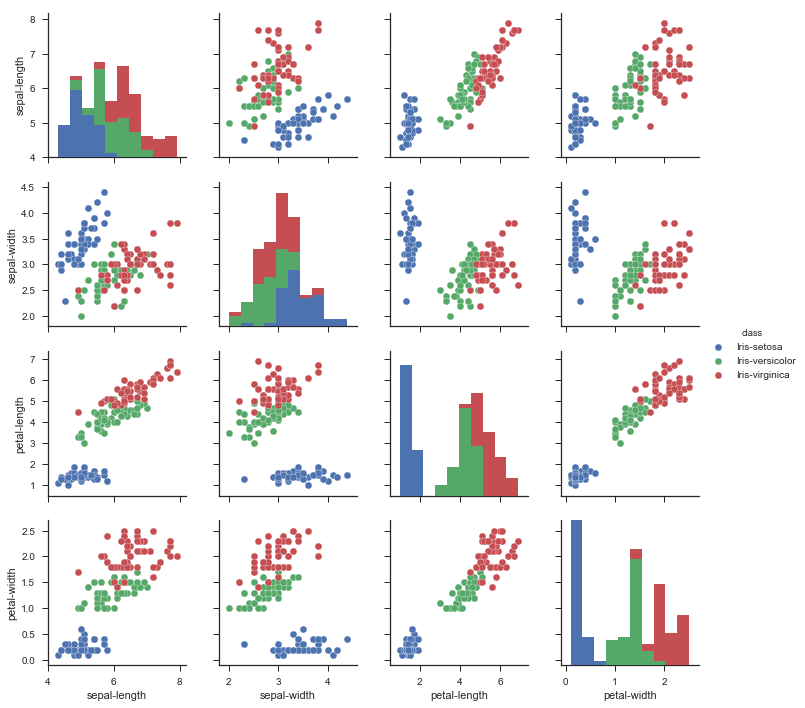

In [9]:
# in this part we use seaborn library for making a pair plot
# check seaborn documentation for boost your visualization skills
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset, hue='class')
replacements = {'sepal_length': r'$\alpha$', 'sepal_width': 'sepal',
                'petal_length': r'$\beta$', 'petal_width': 'petal',
                'versicolor': 'bloop'}

for i in range(4):
    for j in range(4):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

# Exploring Violin Plot

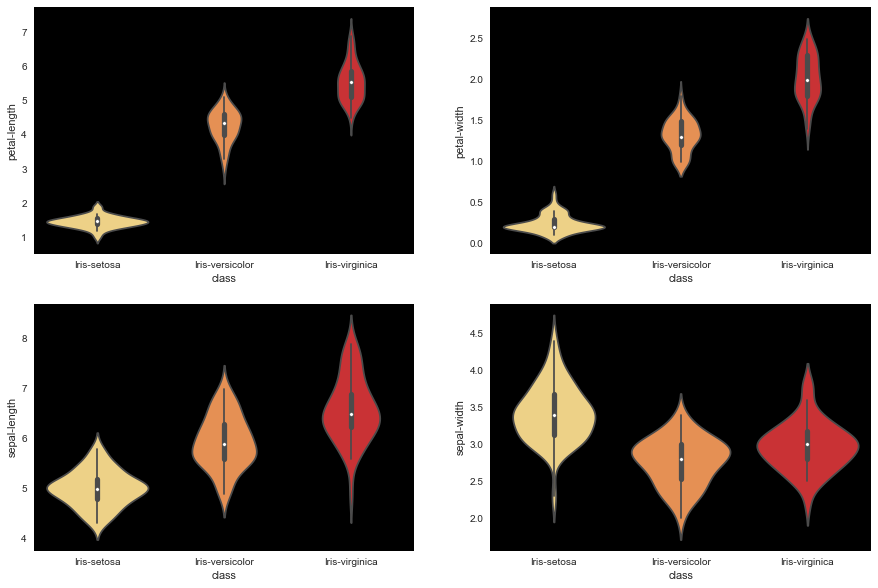

In [10]:
#Violin plot of iris flowers data
sns.set_style('dark', {'axes.facecolor':'black'}) # make a black background of subplots
plt.figure(figsize=(15,10)) # specify the figure size
plt.subplot(2,2,1) # we point out to the top left subplot
sns.violinplot(x='class',y='petal-length',data=dataset,
               palette='YlOrRd')
plt.subplot(2,2,2) # top right plot
sns.violinplot(x='class',y='petal-width',data=dataset,
              palette='YlOrRd')
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal-length',data=dataset,
              palette='YlOrRd')
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal-width',data=dataset,
              palette='YlOrRd')

In [104]:
# Here we can see a heatmap of dataset

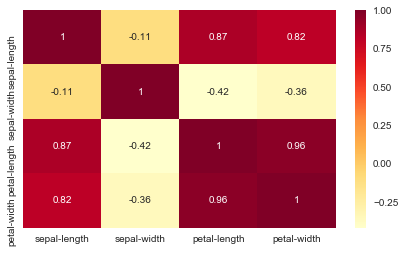

In [105]:
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset.corr(),annot=True,cmap='YlOrRd')
plt.show()

#### The heat map show us that The Sepal width and length are not correlated but The Petal width and length are highly correlated

# Splitting dataset

In [106]:
#in this part we want to split our dataset to train-set and test-set

# X variable contains our features actually our 2-dimensional matrix of features
# we use iloc for choose features from their indexes, in bracket first colon specify the rows and when it's empty
# on both side it means we want all of the rows,let's check some examples:
# [:,:] -> all rows, all columns
# [1:3, 2] ->  rows 1 to 3 but except three (upper band is excluded) with column number two
X = dataset.iloc[:,:4].values

# y variable contains class column
y = dataset.iloc[:,4].values

In [107]:
# here we use train_test_split from model_selection to split train_set and the test_set for both features and labels
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# Consider we choose 20 percent of data for test_set an 80 percent for train_set, and the random_state which
# is optional but if you set it to zero as i did you will get resluts like me

# Feature Scaling

In [109]:
# Feature scaling is an important step in machine learning and datascience tasks
# we use it for standardize or normalize the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() #first we make an instance of our StandardScaler()
# Then we apply the scaler for both X_train and X_test
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Consider there is no need to apply scaler to y_train or y_test because the class vector contains categorical values
# and we just apply it to numeric values

# Spot Checking Algorithms

# Accuracy

In [110]:
# In this part we want to spot checking our algorithms and see which algorithms perform well on the tasl
models = [] # we append all models in a list first
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

results = []
names = []

for name, model in models: # in this loop we apply k-fold cross-validation with 10 split on algorithms and check resluts
    kfold = KFold(n_splits=10,random_state=0)
    cvr = cross_val_score(model, X_train, y_train,
                         cv=kfold, scoring='accuracy')
    results.append(cvr)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cvr.mean(), cvr.std())
    print(msg)

LR: 0.883333 (0.100000)
LDA: 0.966667 (0.040825)
KNN: 0.933333 (0.062361)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.941667 (0.065085)


/home/sparda/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


# Compare Algorithms

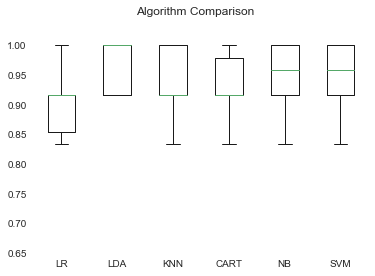

In [111]:
# in this part we compare them in box plot
sns.set_style('dark', {'axes.facecolor':'white'})
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Testing with Logistic Regression

In [168]:
# first let's make our model instace
logreg = LogisticRegression()

In [169]:
#now we should fit it to our training set
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
#now it is time to make predictions
logreg_pred = logreg.predict(X_test)

In [171]:
#let's see how it performs
print(confusion_matrix(y_test,logreg_pred))
print('\n')
print(classification_report(y_test,logreg_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.62      0.83      0.71         6

    avg / total       0.89      0.87      0.87        30



In [172]:
# OK, wasn't best but it was good it makes 89% accuracy

# Testing with Naive Bayes

In [173]:
nb_model = GaussianNB()

In [174]:
nb_model.fit(X_train,y_train)

GaussianNB(priors=None)

In [175]:
nb_pred = nb_model.predict(X_test)

In [176]:
#let's see how it performs
print(confusion_matrix(y_test,nb_pred))
print('\n')
print(classification_report(y_test,nb_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30



# Testing Knn with changing k value

In [112]:
# in next step we want to check how Knn algorithm perform on our classification task
knn = KNeighborsClassifier() # we make an instance of the model from it's class first

In [113]:
# in this step we want to figure out what is the best k value or how many neighbors should we consider
error_rate = [] # we make a loop that iterate from 1 to 40 for our purpose
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i) # in each iteration we make a model with i neighbors 
    knn.fit(X_train,y_train) # then fit our model to training set
    pred_i = knn.predict(X_test) # then make prediction
    error_rate.append(np.mean(pred_i != y_test)) # finally append the mean of where model make it wrong to our error_rate

Text(0,0.5,'Error Rate')

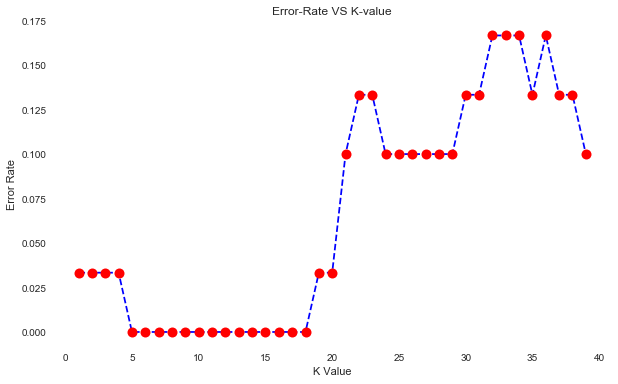

In [114]:
# In this part we plot the result of errors to make the decision of choosing k value better 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue',
        linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error-Rate VS K-value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [115]:
# as you can see from k = 5 to k = 18 ( almost ) we have minimum error rate so we choose 5 as k-value

# Re-train and test KNN

In [123]:
# Now it's time to re train the model with our new k value
new_knn = KNeighborsClassifier(n_neighbors=5)
new_knn.fit(X_train,y_train)
knn_pred = new_knn.predict(X_test)

In [124]:
# In this part we want evaluate the model to see how it performs
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30



In [125]:
# if you still didn't check the confusion matrix document please check the wikipedia link for it 

# Testing SVM with different parameters

In [126]:
# Now it's SVM's turn to perform on the dataset, so let's make an instance of it's class
svm = SVC()

In [127]:
# In svm there are many parameters that you can choose; better parameters means more accurate results

# Grid Search is a method that help us to find best parameters of a model
from sklearn.grid_search import GridSearchCV

In [128]:
# we want to change to parameters of svm which are 'C' and 'gamma'
# for next step we make a dictionary of possible values of these two parameters( You can play with these values,
# choose another values and test again )
param = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [129]:
grid = GridSearchCV(svm,param, verbose=3) # next we make a model of grid search and specify our model and parameters
#for verbose just specify a model

In [130]:
# now it's time to train the grid model based on svm
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.853659 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.825000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.846154 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.804878 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.850000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.743590 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=0.1, score=0.871795 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.926829 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.975000 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.923077 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.926829 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.975000 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.923077 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [131]:
# we can see the best parameters with is code
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [132]:
# and also check out the best estimator with this line of code
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
grid_pred = grid.predict(X_test)

In [140]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30



In [142]:
# also we can rebuild our model with new parameters but it's just for fun cuz this gonna perform like the code above
new_svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

new_svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
new_svc_pred = new_svc.predict(X_test)

In [144]:
print(confusion_matrix(y_test, new_svc_pred))
print('\n')
print(classification_report(y_test, new_svc_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30



# Using Ensemble Methods

# Random Forest

In [145]:
#in this section we want use the ensemble methods and for first ensemble method we choose random forest
from sklearn.ensemble import RandomForestClassifier

In [158]:
# as we did before in knn section we want to choose best parameters for random forest too
#random forest actually ensemble many decision tree to perform better
err_rate = []
for i in range(1,50):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

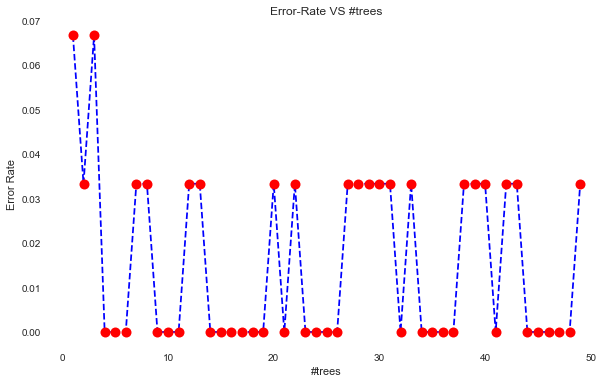

In [159]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),err_rate, color='blue',
        linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error-Rate VS #trees')
plt.xlabel('#trees')
plt.ylabel('Error Rate')


In [161]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [162]:
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30



# Adaboost

In [163]:
# Adaboost is another ensemble method
from sklearn.ensemble import AdaBoostClassifier

In [164]:
# we make all steps that we did in last sections
error_rate = []
for i in range(1,100):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

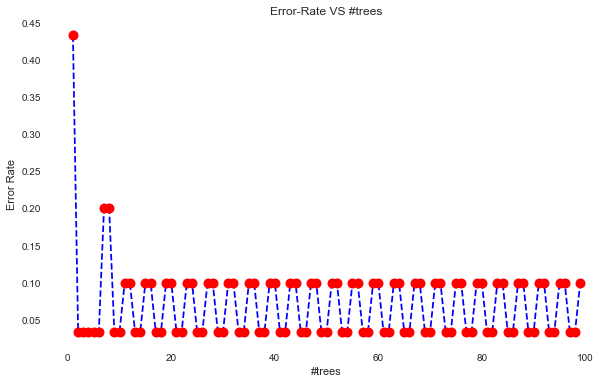

In [165]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate, color='blue',
        linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error-Rate VS #trees')
plt.xlabel('#trees')
plt.ylabel('Error Rate')

In [166]:
adaboost = AdaBoostClassifier(n_estimators=5)
adaboost.fit(X_train, y_train)
ada_pred = adaboost.predict(X_test)

In [167]:
print(confusion_matrix(y_test, ada_pred))
print('\n')
print(classification_report(y_test, ada_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30



# Well Done
## i know that wasn't a very good tutorial but i tried to do it well, hope it was useful